<a href="https://colab.research.google.com/github/WilliamHallPortfolio/ACS_Juvenile_Justice_Project/blob/main/ACS%20and%20JJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACS Flash Report Project <br>
Based on updated data (October 4th 2024).

Dataset and data definitions can be found here: <br>
https://data.cityofnewyork.us/City-Government/Monthly-Flash-Report-indicators/2ubh-v9er/about_data

The Flash report provides monthly performance data on key ACS child welfare, child care, and juvenile justice functions such as children using vouchers for child care, child protective caseloads, and the number of admissions to detention. Each row of data in the Excel file posted to Open Data is a distinct measure in the Flash Report.The columns are the month of the data. Data are updated semiannually in September and April using data from queries of administrative data systems and data provided directly from program areas.

This project focuses on Juvenile Justice and detention rates of youth

## Import Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
!git clone https://github.com/WilliamHallPortfolio/ACS_Juvenile_Justice_Project.git

fatal: destination path 'ACS_Juvenile_Justice_Project' already exists and is not an empty directory.


In [4]:
df = pd.read_csv("/content/ACS_Juvenile_Justice_Project/Open_Data_FLASH_Jan_2015_-_June_2024.csv")
df.head()

,Indicators,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,...,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
0,Children using vouchers for child care,"67,674","66,196","66,860","66,710","67,319","68,736","67,674","67,620","66,734",...,"65,702","66,975","68,445","70,536","72,055","74,214","74,935","76,189","76,591","77,216"
1,Children using low income vouchers for child care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"25,700","27,137","29,015","30,732","32,217","34,545","36,401","38,750","40,225","42,176"
2,SCR intakes,"5,470","4,879","6,545","5,261","5,799","4,962","3,958","3,939","4,221",...,"4,568","5,468","5,184","4,952","5,584","5,074","5,940","5,180","5,937","4,755"
3,Consolidated Investigations,"4,944","4,353","5,917","4,671","5,205","4,380","3,480","3,471","3,717",...,"3,142","3,572","3,504","3,303","3,597","3,390","3,826","3,301","3,979","3,268"
4,CARES Cases,52,46,75,58,58,44,10,8,25,...,746,"1,161","1,072",996,"1,290","1,063","1,281","1,101","1,193",727


In [5]:
# Printing dataset dimensions
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  86
Number of columns:  115


In [6]:
# Setting index to row headers
df.set_index('Indicators', inplace=True)
df.head()

,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,...,September 2023,October 2023,November 2023,December 2023,January 2024,February 2024,March 2024,April 2024,May 2024,June 2024
Indicators,,,,,,,,,,,,,,,,,,,,,
Children using vouchers for child care,"67,674","66,196","66,860","66,710","67,319","68,736","67,674","67,620","66,734","67,266",...,"65,702","66,975","68,445","70,536","72,055","74,214","74,935","76,189","76,591","77,216"
Children using low income vouchers for child care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"25,700","27,137","29,015","30,732","32,217","34,545","36,401","38,750","40,225","42,176"
SCR intakes,"5,470","4,879","6,545","5,261","5,799","4,962","3,958","3,939","4,221","5,725",...,"4,568","5,468","5,184","4,952","5,584","5,074","5,940","5,180","5,937","4,755"
Consolidated Investigations,"4,944","4,353","5,917","4,671","5,205","4,380","3,480","3,471","3,717","5,110",...,"3,142","3,572","3,504","3,303","3,597","3,390","3,826","3,301","3,979","3,268"
CARES Cases,52,46,75,58,58,44,10,8,25,63,...,746,"1,161","1,072",996,"1,290","1,063","1,281","1,101","1,193",727


In [7]:
# Transposing dataframe
df = df.T
# Head of df
df.head()

Indicators,Children using vouchers for child care,Children using low income vouchers for child care,SCR intakes,Consolidated Investigations,CARES Cases,Total Consolidated Investigations and CARES Cases,Indication Rate,% of Cases (Investigations and CARES) w/ Indicated Investigations,CPS caseload CW,CPS caseload BX,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
January 2015,"67,674",NaN,"5,470","4,944",52,"4,996",39.8%,NaN,11.6,12.4,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
February 2015,"66,196",NaN,"4,879","4,353",46,"4,399",40.1%,NaN,11.2,12.1,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
March 2015,"66,860",NaN,"6,545","5,917",75,"5,992",39.2%,NaN,11.5,12.7,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
April 2015,"66,710",NaN,"5,261","4,671",58,"4,729",38.0%,NaN,11.2,12.8,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
May 2015,"67,319",NaN,"5,799","5,205",58,"5,263",37.8%,NaN,11.1,12.2,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106


Converting index to Datetime

In [8]:
df_reset = df.reset_index()
df_reset['index'] = pd.to_datetime(df_reset['index'], format='%B %Y').dt.strftime('%Y-%m')
df_reset.set_index('index', inplace=True)
df = df_reset

Converting objects to numeric dtypes

In [9]:
df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce') if x.name != 'Indicators' else x)
df.head()

Indicators,Children using vouchers for child care,Children using low income vouchers for child care,SCR intakes,Consolidated Investigations,CARES Cases,Total Consolidated Investigations and CARES Cases,Indication Rate,% of Cases (Investigations and CARES) w/ Indicated Investigations,CPS caseload CW,CPS caseload BX,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
index,,,,,,,,,,,,,,,,,,,,,
2015-01,67674,NaN,5470,4944,52,4996,NaN,NaN,11.6,12.4,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
2015-02,66196,NaN,4879,4353,46,4399,NaN,NaN,11.2,12.1,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
2015-03,66860,NaN,6545,5917,75,5992,NaN,NaN,11.5,12.7,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
2015-04,66710,NaN,5261,4671,58,4729,NaN,NaN,11.2,12.8,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
2015-05,67319,NaN,5799,5205,58,5263,NaN,NaN,11.1,12.2,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106


Stripping extra characters/spaces from column names

In [10]:
df.columns = df.columns.str.strip()
df.columns

Index(['Children using vouchers for child care',
       'Children using low income vouchers for child care', 'SCR intakes',
       'Consolidated Investigations', 'CARES Cases',
       'Total Consolidated Investigations and CARES Cases', 'Indication Rate',
       '% of Cases (Investigations and CARES) w/ Indicated Investigations',
       'CPS caseload CW', 'CPS caseload BX', 'CPS caseload BK',
       'CPS caseload MN', 'CPS caseload QN', 'CPS caseload SI',
       'CPS caseload OSI', 'OSI Total', 'OSI Foster Care', 'OSI Day Care',
       'Article 10 filings Total', 'Court Ordered Supervision',
       'Court Order Removals', 'Other Filing Outcomes', 'Post-Filing Removals',
       'Pre-Filing Emergency Removals', 'Total new prevention cases',
       'General Prevention new cases', 'FTR new cases', 'EBM new cases',
       'Special Medical new cases', 'Total Children's Center Population',
       '0 - 3 yrs. Children's Center', '4 - 6 yrs. Children's Center',
       '7 - 10 yrs. Children's Ce

Selecting columns pertinent to Juvenile Justice / Close to Home (CTH) programs

In [11]:
df_jj = df[['JD placements','Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention',
       'Population Specialized Juvenile detention',
       'Population Non-Secure Detention', 'Average daily population AO',
       'Average daily population JD', 'Average daily population JO',
       'Average daily population pre-Raise the Age',
       'Average daily population Other', 'NSP admits', 'LSP admits',
       'CTH admissions Total', 'NSP General Male', 'NSP General Female',
       'NSP Specialized Male', 'NSP Specialized Female', 'NSP TFCO',
       'NSP Other', 'LSP Male', 'LSP Female',
       'LSP Intensive Support Male/Female', 'Total CTH', 'NSP Total',
       'LSP Total', 'Release from CTH Placement to Aftercare',
       'CTH Aftercare Census']]
df_jj

Indicators,JD placements,Detention Admissions,Releases from Detention,Population in Secure Detention,Population Specialized Juvenile detention,Population Non-Secure Detention,Average daily population AO,Average daily population JD,Average daily population JO,Average daily population pre-Raise the Age,...,NSP TFCO,NSP Other,LSP Male,LSP Female,LSP Intensive Support Male/Female,Total CTH,NSP Total,LSP Total,Release from CTH Placement to Aftercare,CTH Aftercare Census
index,,,,,,,,,,,,,,,,,,,,,
2015-01,12.0,240,201,99,NaN,64,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,176,176,NaN,16,123
2015-02,13.0,191,217,107,NaN,76,NaN,NaN,NaN,NaN,...,6,NaN,NaN,NaN,NaN,145,145,NaN,27,118
2015-03,18.0,258,259,93,NaN,59,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,164,164,NaN,21,122
2015-04,16.0,202,206,81,NaN,64,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,168,168,NaN,11,124
2015-05,19.0,256,242,79,NaN,75,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,173,173,NaN,11,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02,7.0,173,163,245,0.0,47,182.0,59.0,51.0,0.0,...,0,0.0,17.0,1.0,0.0,87,69,18.0,5,19
2024-03,9.0,172,175,244,0.0,54,177.0,67.0,54.0,0.0,...,0,0.0,15.0,1.0,0.0,82,66,16.0,8,24
2024-04,10.0,154,167,242,0.0,49,174.0,61.0,56.0,0.0,...,0,0.0,15.0,1.0,0.0,89,73,16.0,10,32


In [12]:
df_jj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2015-01 to 2024-06
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   JD placements                               113 non-null    float64
 1   Detention Admissions                        114 non-null    int64  
 2   Releases from Detention                     114 non-null    int64  
 3   Population in Secure Detention              114 non-null    int64  
 4   Population Specialized Juvenile detention   70 non-null     float64
 5   Population Non-Secure Detention             114 non-null    int64  
 6   Average daily population AO                 77 non-null     float64
 7   Average daily population JD                 90 non-null     float64
 8   Average daily population JO                 90 non-null     float64
 9   Average daily population pre-Raise the Age  72 non-null     float64
 10  Average d

Checking columns with Nans

In [13]:
df_jj.isnull().sum()

,0
Indicators,
JD placements,1
Detention Admissions,0
Releases from Detention,0
Population in Secure Detention,0
Population Specialized Juvenile detention,44
Population Non-Secure Detention,0
Average daily population AO,37
Average daily population JD,24
Average daily population JO,24


Imputing zeros to Nans due to the lack of accurate recordkeeping in the earlier months.

In [14]:
# Filling Nans with zeros
df_jj.fillna(0,inplace=True)

# Checking number of Nans after imputing
df_jj.isnull().sum().sum()

0

In [15]:
# Creating 'Month' and 'Fiscal Year' Columns
# July month 1 - June month 12
df_jj['Month'] = pd.to_datetime(df_jj.index, format='%Y-%m')
df_jj['Fiscal Year'] = df_jj['Month'].apply(lambda x: x.year + 1 if x.month >= 7 else x.year)
df_jj['Fiscal Month'] = df_jj['Month'].dt.month.apply(lambda x: x - 6 if x >= 7 else x + 6)


## Visualiztions
The visualizations created here will examine **Fiscal Years 2022, 2023, and 2024** <br>
for simplicity


In [23]:
# Selecting FY22, FY23, and FY24
df_years = df_jj[df_jj['Fiscal Year'].isin([2022,2023,2024])]

In [15]:
df_jj.drop(columns=['Population Specialized Juvenile detention','NSP Specialized Female',
                        'NSP TFCO','NSP Other','LSP Intensive Support Male/Female',
                        'Average daily population pre-Raise the Age'],inplace=True)

In [17]:
df_jj.columns

Index(['JD placements', 'Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention', 'Population Non-Secure Detention',
       'Average daily population AO', 'Average daily population JD',
       'Average daily population JO', 'Average daily population Other',
       'NSP admits', 'LSP admits', 'CTH admissions Total', 'NSP General Male',
       'NSP General Female', 'NSP Specialized Male', 'LSP Male', 'LSP Female',
       'Total CTH', 'NSP Total', 'LSP Total',
       'Release from CTH Placement to Aftercare', 'CTH Aftercare Census',
       'Month', 'Fiscal Year', 'Fiscal Month'],
      dtype='object', name='Indicators')

In [18]:
# Selecting columns for visualization
columns = ['JD placements', 'Detention Admissions', 'Releases from Detention',
       'Population in Secure Detention', 'Population Non-Secure Detention',
       'Average daily population AO', 'Average daily population JD',
       'Average daily population JO', 'Average daily population Other',
       'NSP admits', 'LSP admits', 'CTH admissions Total', 'NSP General Male',
       'NSP General Female', 'NSP Specialized Male', 'LSP Male', 'LSP Female',
       'Total CTH', 'NSP Total', 'LSP Total',
       'Release from CTH Placement to Aftercare', 'CTH Aftercare Census']

**Months in Fiscal Years:**
Month 1: July
Month 12: June

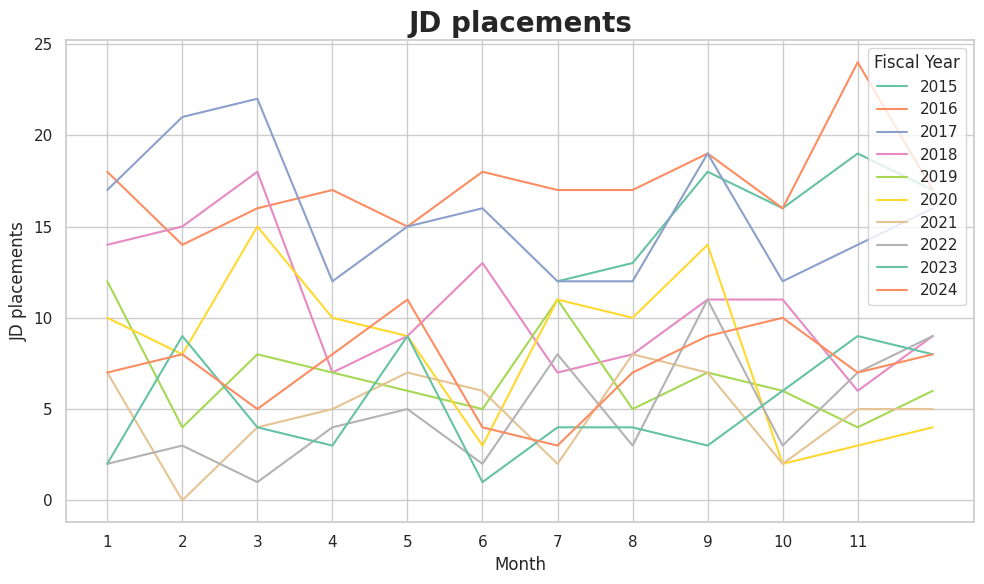

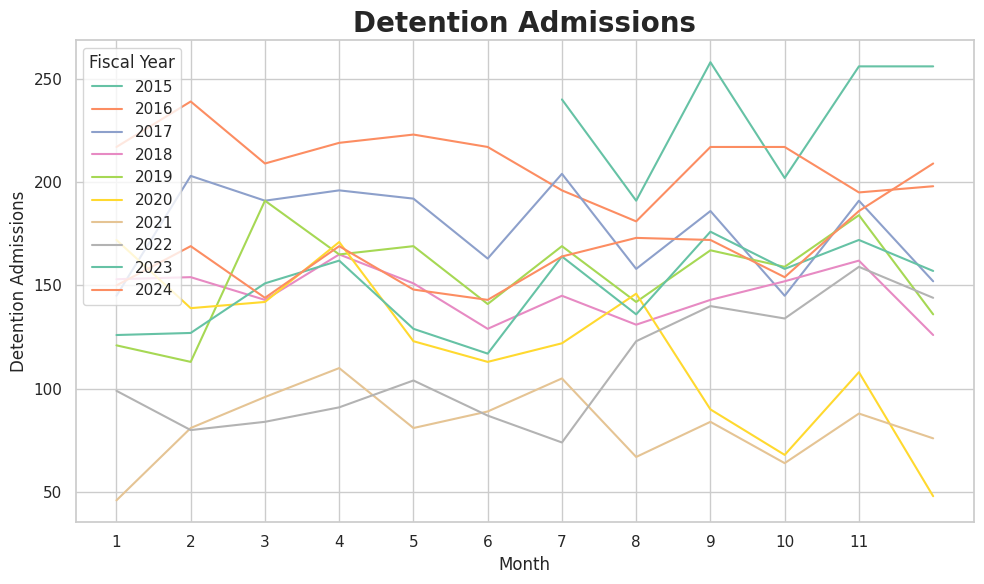

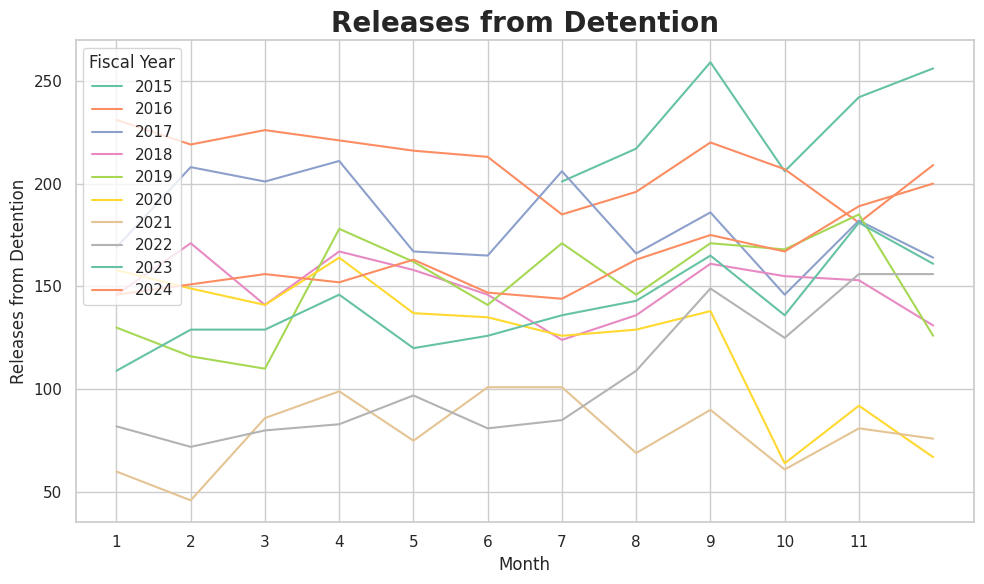

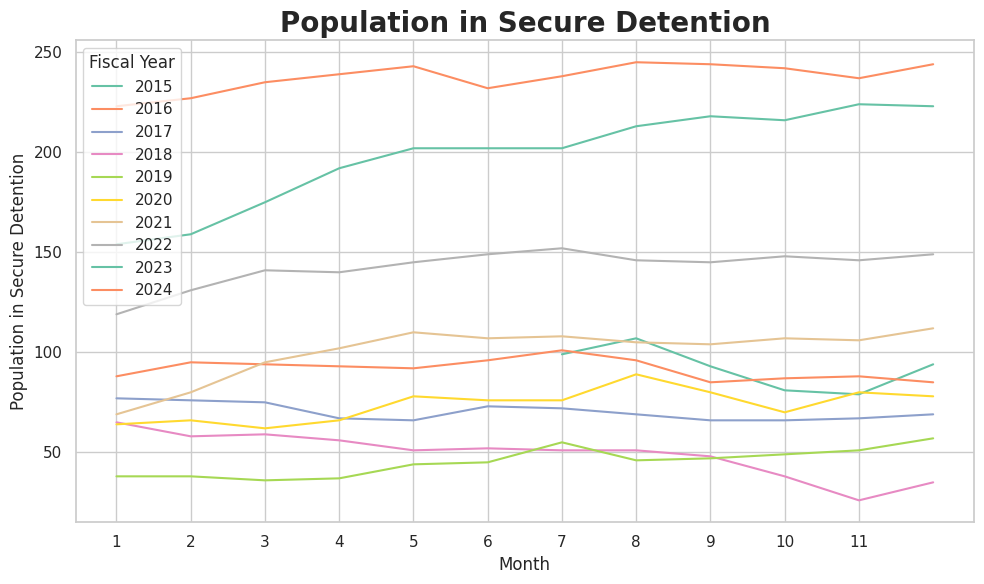

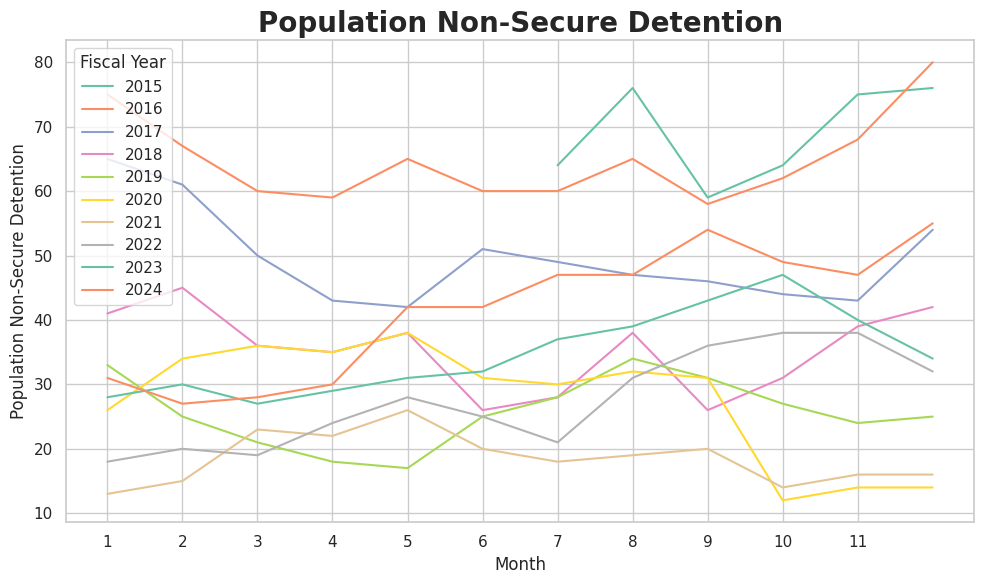

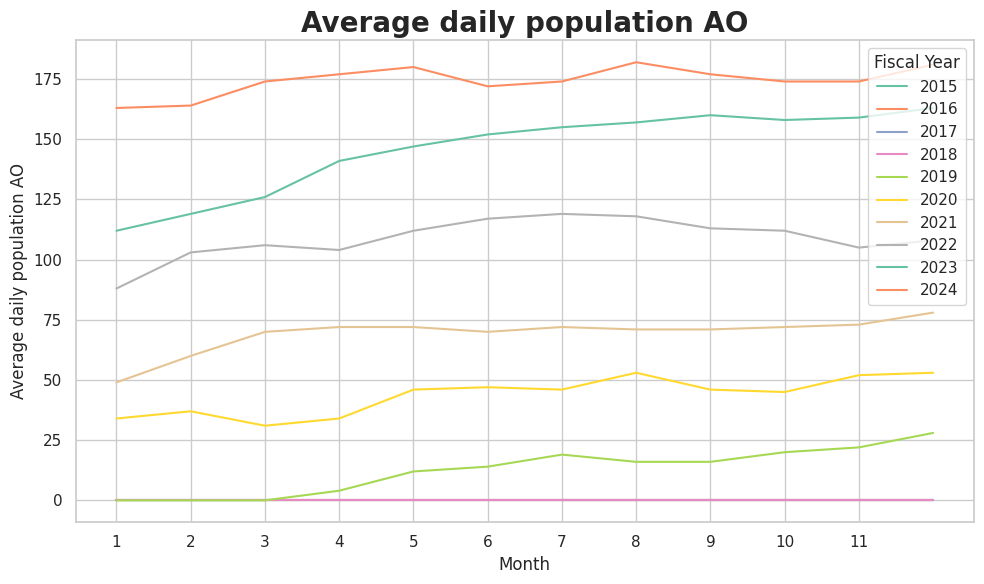

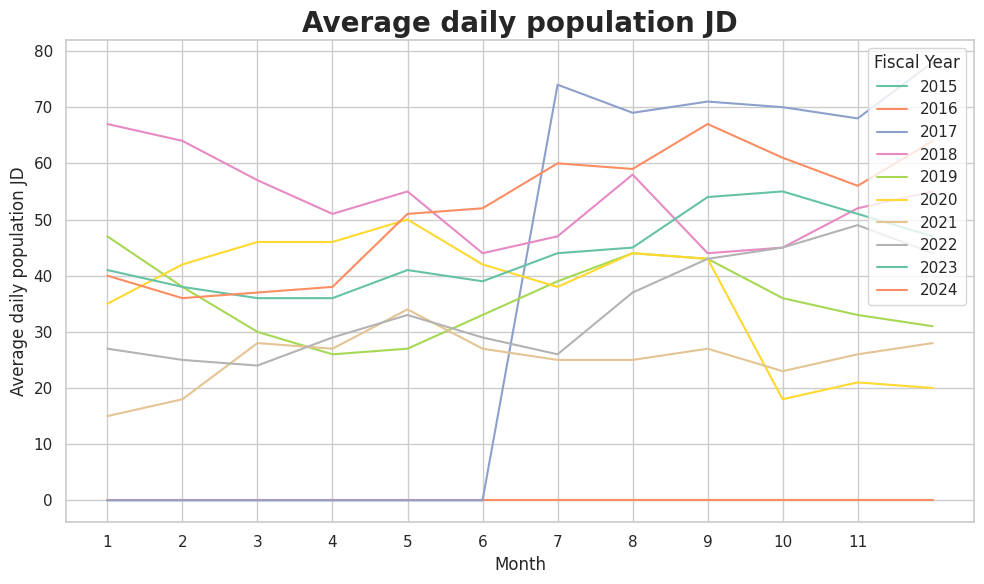

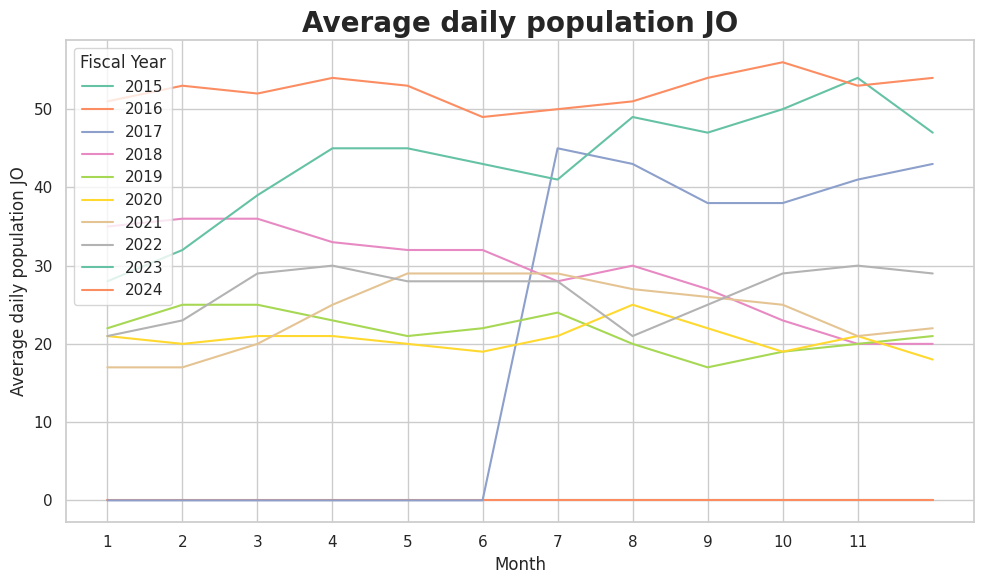

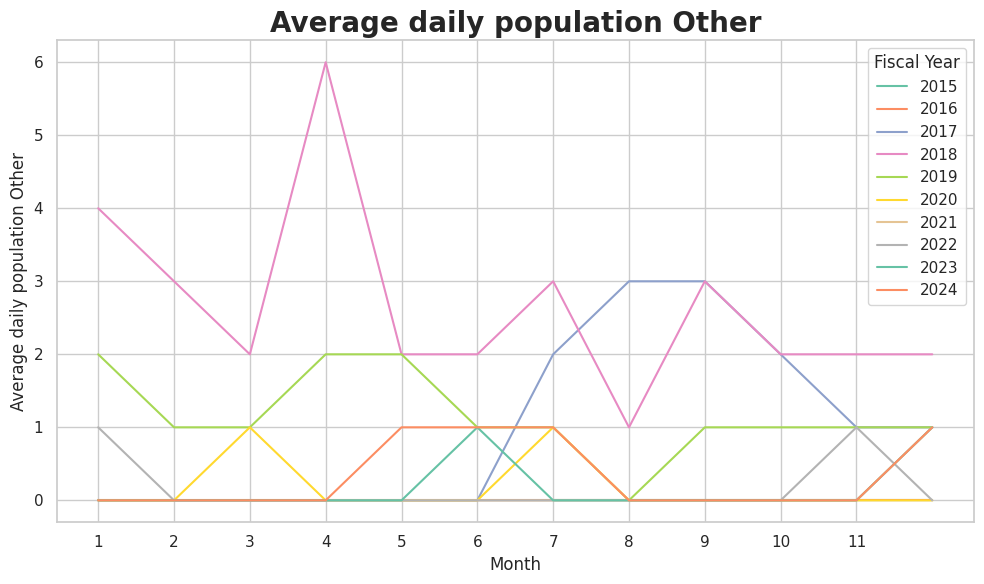

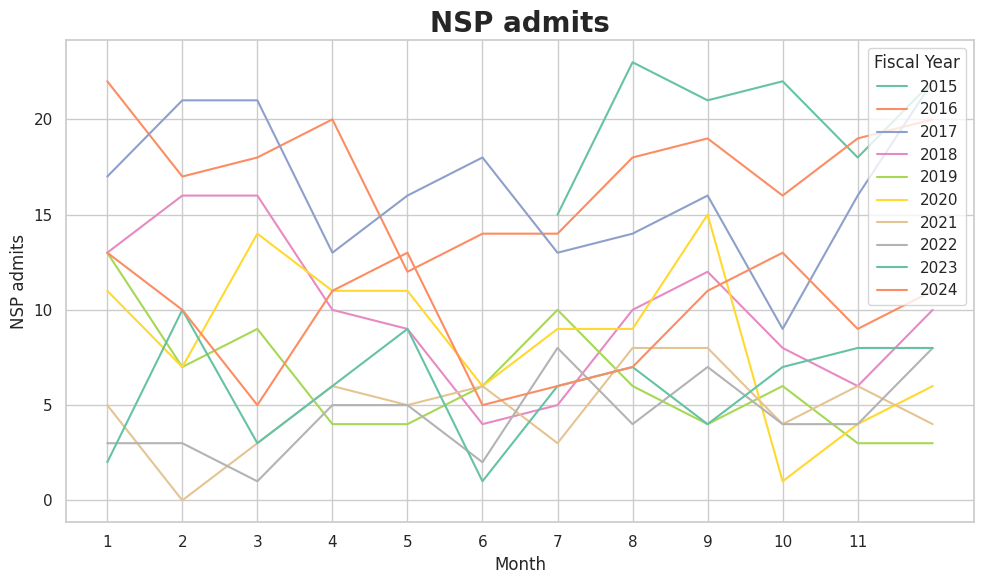

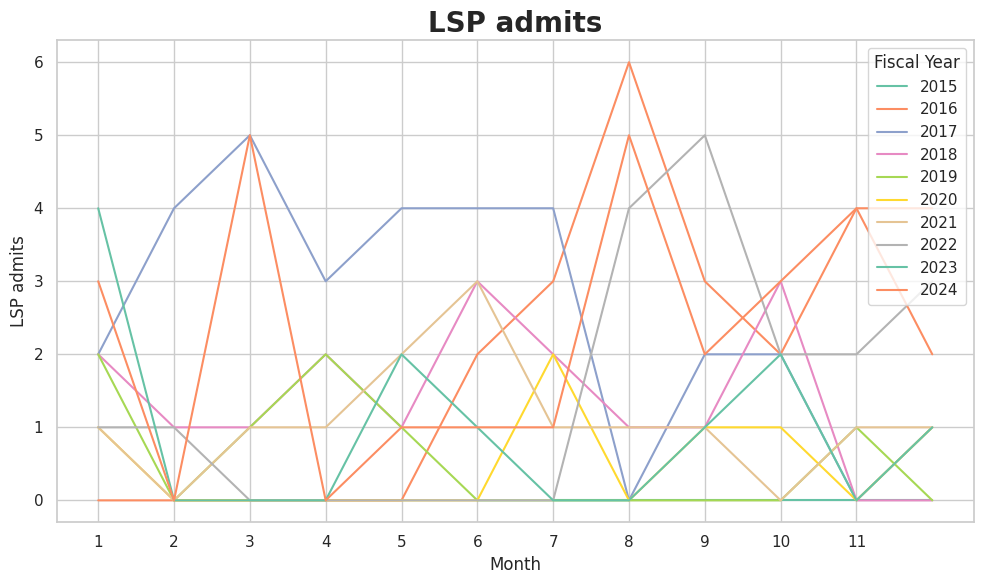

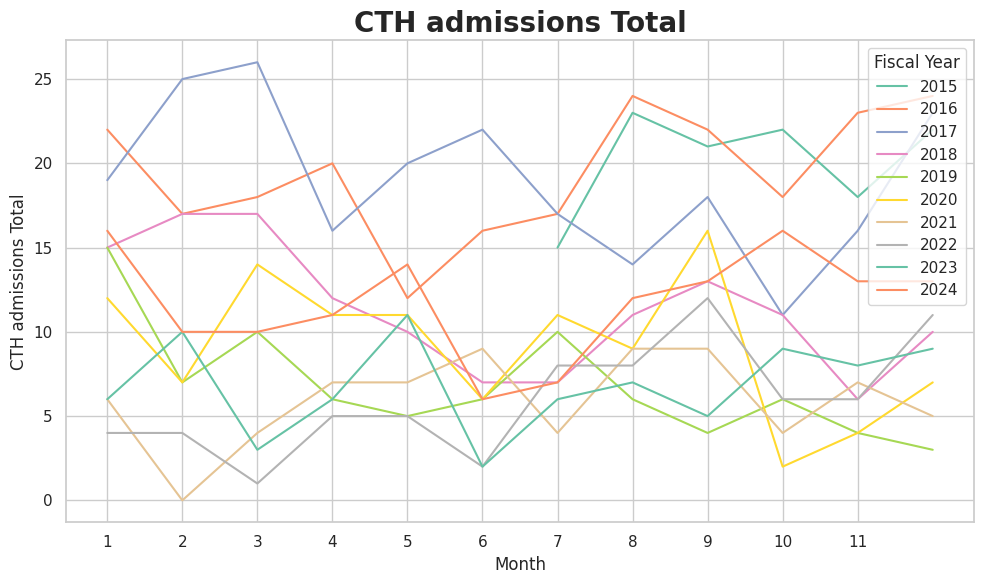

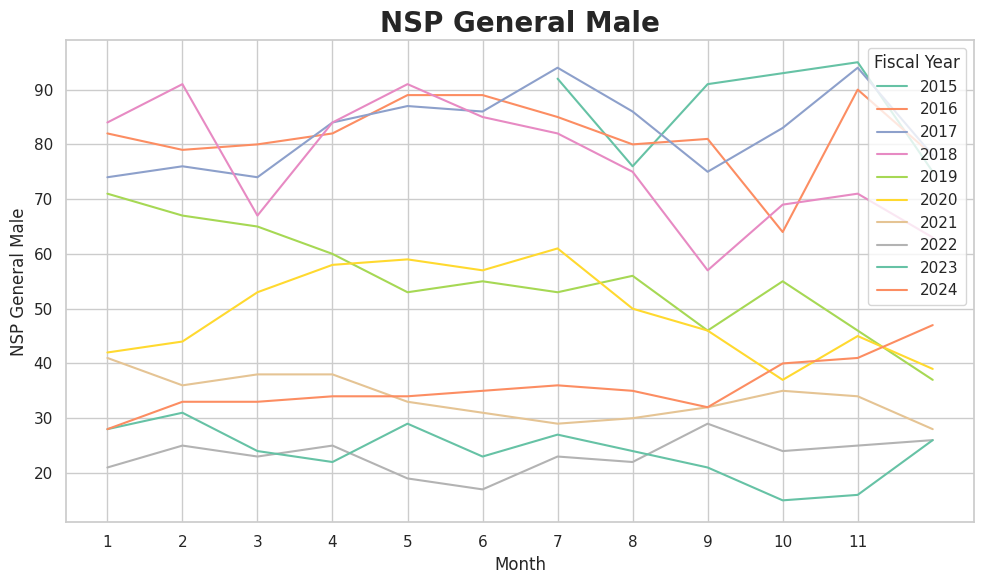

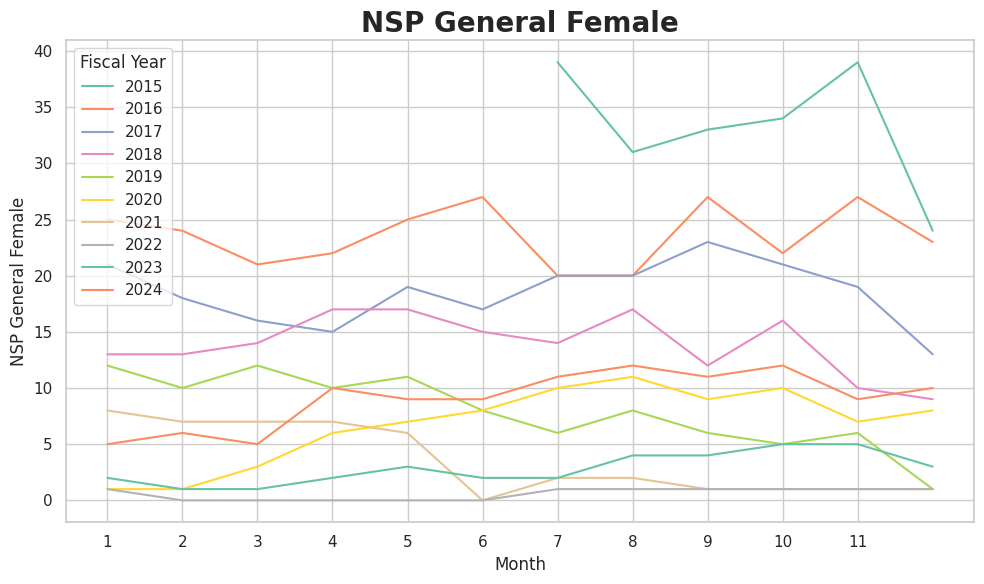

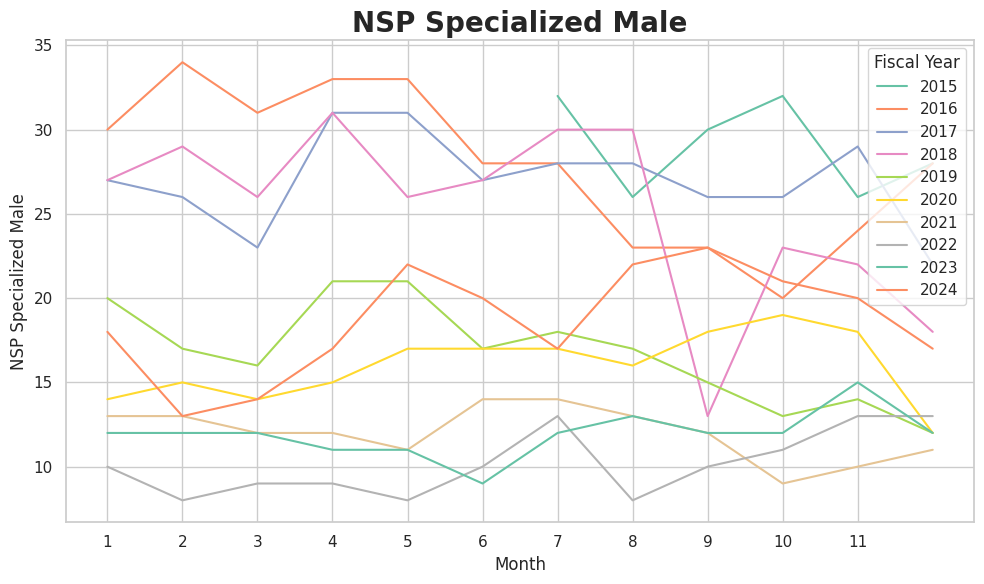

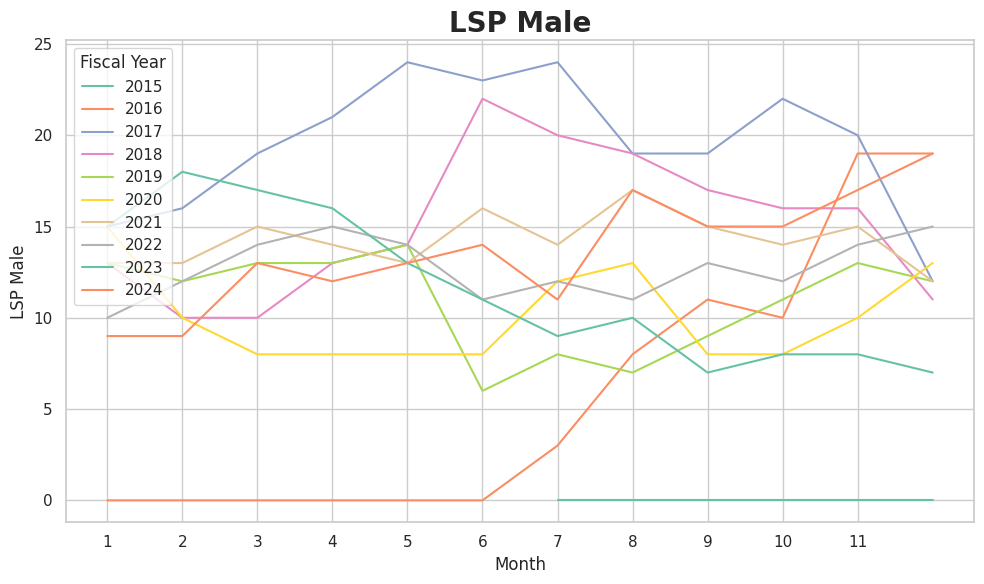

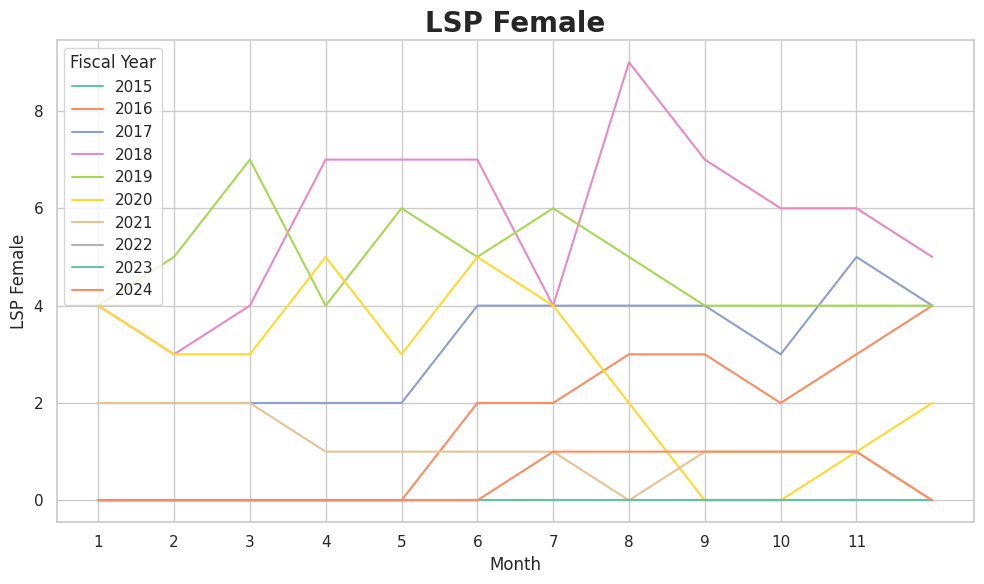

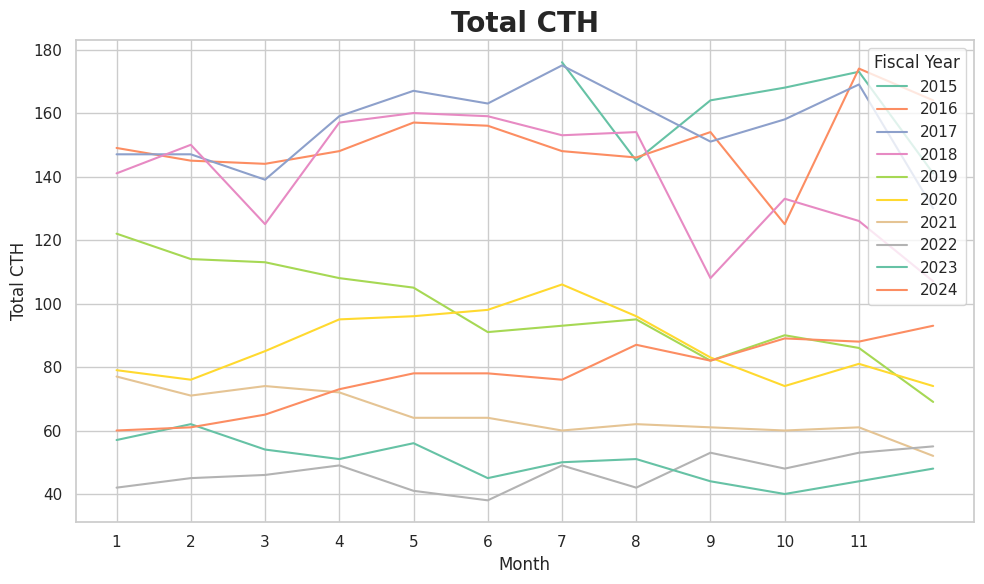

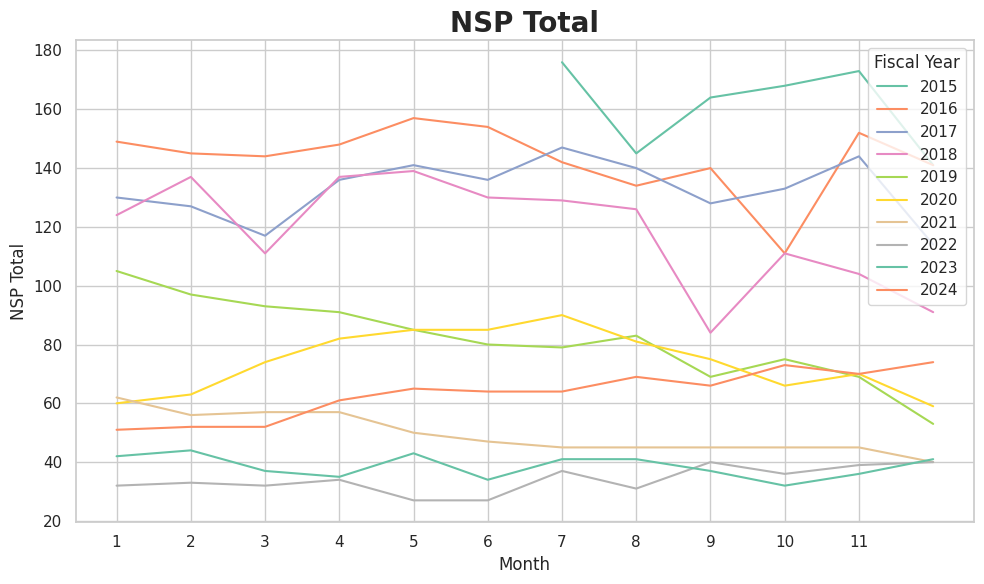

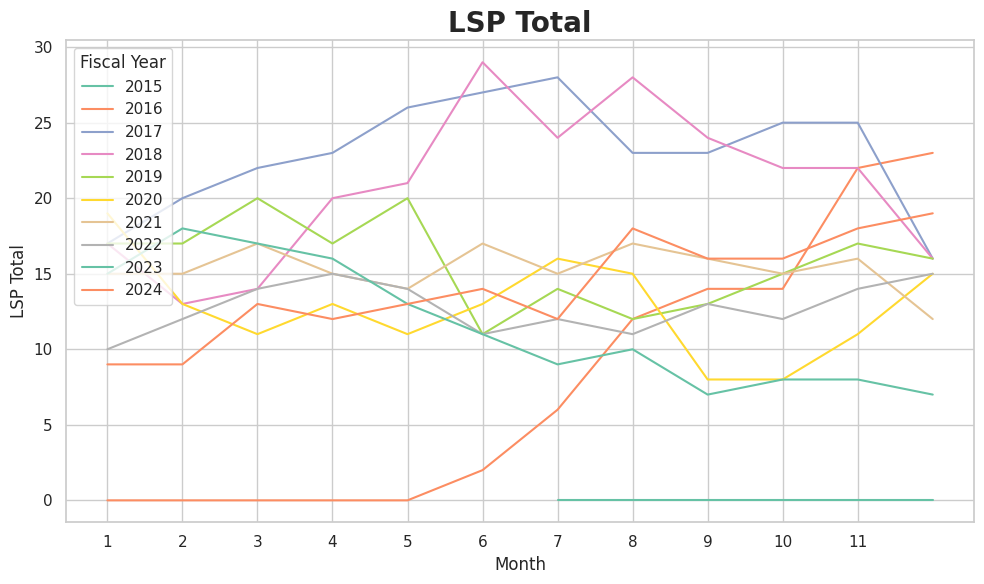

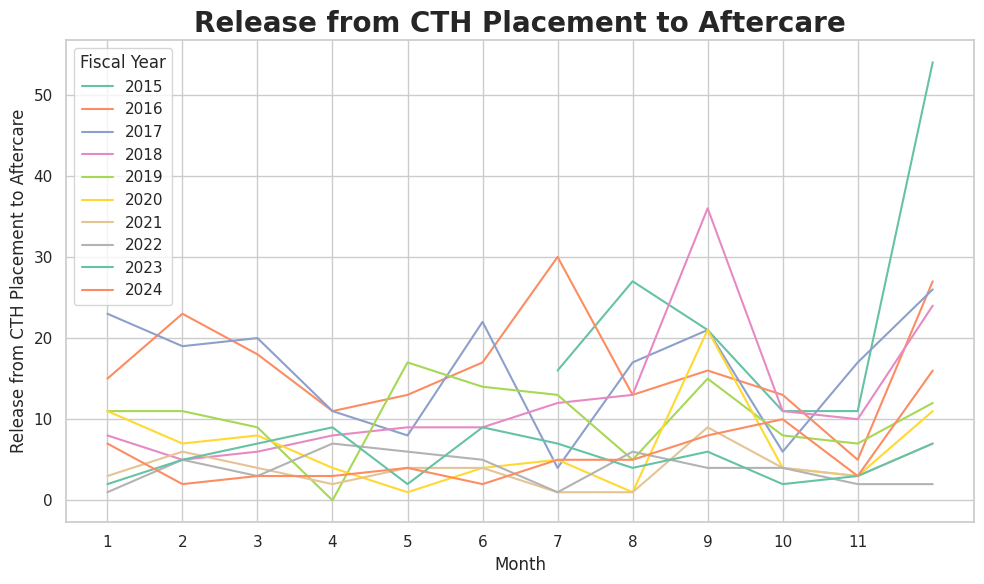

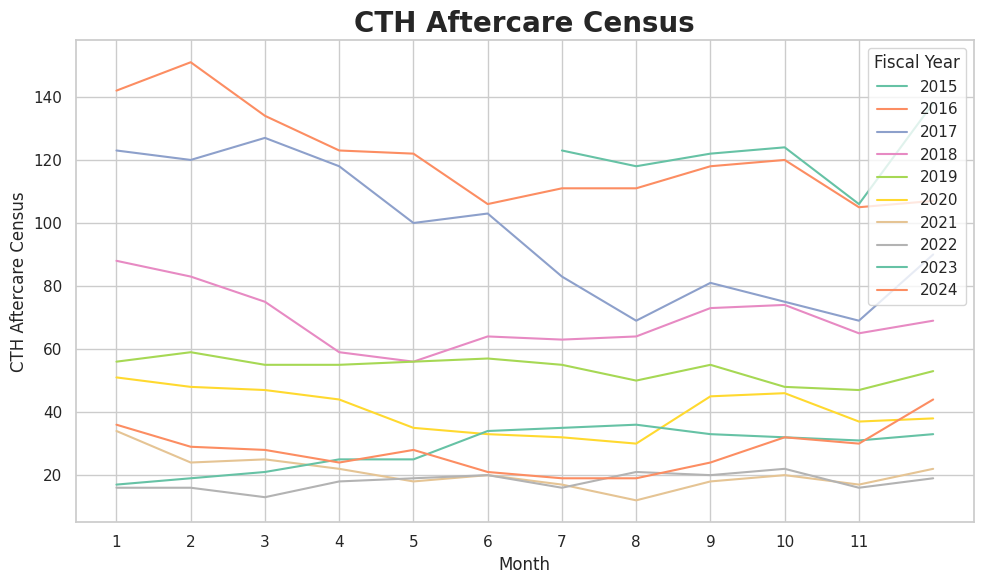

In [20]:
for i in columns:
  palette = sns.color_palette("Set2")
  sns.set(style="whitegrid")
  plt.figure(figsize=(10, 6))
  sns.lineplot(x='Fiscal Month',y= i,hue='Fiscal Year',data=df_jj, palette = palette)

  plt.title(i,fontsize=20,fontweight='bold')
  plt.xticks(range(1,12,1))
  plt.xlabel('Month')
  plt.ylabel(i)
  plt.tight_layout()